In [18]:
import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn # neuron networks
import torch.nn.functional as F

from sklearn.datasets import load_boston
from tqdm.notebook import tqdm # painting progress bars

%matplotlib inline

In [19]:
a = np.random.rand(3,5)

b = np.dot(a, a.T) # matrix multiplication, a.T - matrix transpose
b

array([[1.98658458, 1.43159872, 1.01291758],
       [1.43159872, 1.7651911 , 1.45414038],
       [1.01291758, 1.45414038, 1.39352411]])

In [20]:
np.arange(0, 12).reshape(4, 3) # reshape(X, Y) is function which translate linear numpy array (shape = (1, N)) 
                               #into numpy array of dimensional X x Y (shape = (X, Y)) (i. e. into the matrix X x Y)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])


## PyTorch code

Below we show some examples of using PyTorch


In [21]:
x = torch.rand(2, 3) # Random tensor of dimensionsal 5x3x3
x

tensor([[0.9086, 0.8514, 0.9158],
        [0.4266, 0.4735, 0.0074]])

In [22]:
x.shape # Shape of torch tensors

torch.Size([2, 3])

### Torch tensors has supports all of the ariphmetical operations, which supports numpy arrays

In [23]:
print(x + 2, "\n")
print(x * 2, "\n")
print(x / 2, "\n")
y = x.transpose(1, 0) # Trnaspose tensor around 1 and 0 axis
print(torch.matmul(x, y)) # matrix multiplication in torch
print()
print()
print(y.reshape([2, 3]) * x, "\n") # element-wise multiplication
print(y.reshape([2, 3]) * x) # element-wise summing

tensor([[2.9086, 2.8514, 2.9158],
        [2.4266, 2.4735, 2.0074]]) 

tensor([[1.8172, 1.7028, 1.8315],
        [0.8532, 0.9470, 0.0148]]) 

tensor([[0.4543, 0.4257, 0.4579],
        [0.2133, 0.2368, 0.0037]]) 

tensor([[2.3891, 0.7975],
        [0.7975, 0.4063]])


tensor([[8.2558e-01, 3.6321e-01, 7.7968e-01],
        [2.0200e-01, 4.3363e-01, 5.4501e-05]]) 

tensor([[8.2558e-01, 3.6321e-01, 7.7968e-01],
        [2.0200e-01, 4.3363e-01, 5.4501e-05]])


In [24]:
print("Mean by columns = " ,x.mean(dim=0)) # mean value by columns (in numpy use axis= instead)
print("Mean by raws = ", x.mean(dim=1)) # mean value by raws

Mean by columns =  tensor([0.6676, 0.6625, 0.4616])
Mean by raws =  tensor([0.8919, 0.3025])


In [25]:
torch.arange(0, 10) # arange function in torch create linear tensor

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
torch.square(torch.arange(2, 1001)) # squaring of all the elements of initial tensor

tensor([      4,       9,      16,      25,      36,      49,      64,      81,
            100,     121,     144,     169,     196,     225,     256,     289,
            324,     361,     400,     441,     484,     529,     576,     625,
            676,     729,     784,     841,     900,     961,    1024,    1089,
           1156,    1225,    1296,    1369,    1444,    1521,    1600,    1681,
           1764,    1849,    1936,    2025,    2116,    2209,    2304,    2401,
           2500,    2601,    2704,    2809,    2916,    3025,    3136,    3249,
           3364,    3481,    3600,    3721,    3844,    3969,    4096,    4225,
           4356,    4489,    4624,    4761,    4900,    5041,    5184,    5329,
           5476,    5625,    5776,    5929,    6084,    6241,    6400,    6561,
           6724,    6889,    7056,    7225,    7396,    7569,    7744,    7921,
           8100,    8281,    8464,    8649,    8836,    9025,    9216,    9409,
           9604,    9801,   10000,   102

In [27]:
torch.square(torch.arange(2, 1001)).sum() # sum of all the elements tensor

tensor(333833499)

In [28]:
x.view([3, 2]) # This function use instead of reshape() function in numpy

tensor([[0.9086, 0.8514],
        [0.9158, 0.4266],
        [0.4735, 0.0074]])

All of the methods with suffix _as create actions with initial tensor like tensor passed to function
For example

x.view_as(y) reshaped tensor x to shape like tensor y
After using of x.view_as(y) x have the same shape like y

In [29]:
torch.arange(0, 10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Torch tensors has supports all of the creation operations, which supports numpy arrays

In [30]:
print(torch.zeros(3,5, dtype=torch.float), "\n") # dtype in torch create with torch. instead of numpy. in numpy
print(torch.ones(3, 5), "\n")
print(torch.rand(3, 5, dtype=torch.double))

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]) 

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]) 

tensor([[0.7453, 0.4098, 0.4050, 0.4360, 0.9181],
        [0.2856, 0.2311, 0.6821, 0.3324, 0.8234],
        [0.9960, 0.3696, 0.7952, 0.7679, 0.3069]], dtype=torch.float64)


### Another operations with torch tensors

In [31]:
print(x.shape)
y = x.unsqueeze(0).shape # Add one more dimention for tensor
print(y)

torch.Size([2, 3])
torch.Size([1, 2, 3])


## Gradients

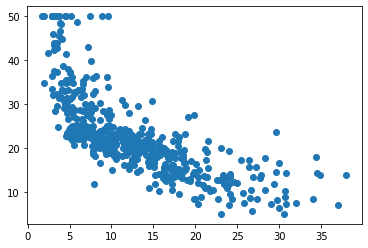

In [32]:
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target)

В PyTorch есть возможность при создании тензора указывать, нужно ли считать по нему градиент или нет с помощью параметра *requires_grad*. Когда *requires_grad=True* мы сообщаем фреймворку о том, что хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у тензора, у которого этот параметр определен как *True*, будет доступ к цепочке операций и преобразований, совершенных с ним.
Если эти функции дифференцируемые, то у тензора появляется параметр *.grad*, в котором хранится значение градиента.

Если к результирующему тензору применить *.backward()*, то фреймворк посчитает по цепочке градиент для всех тензоров, у которых *requires_grad=True*

In [33]:
# Linear model (w, b - its numbers, not vectors or tensors)

w = torch.rand(1, requires_grad=True) # weigth of model
b = torch.rand(1, requires_grad=True) # shift (Baies) of model

x = torch.tensor(boston.data[:, -1]/boston.data[:, -1].max(), dtype=torch.float32) # Train
y = torch.tensor(boston.target, dtype=torch.float32) # Ground truth

assert w.grad is None # Tensors was created right now and they has no gradients yet
assert b.grad is None

In [34]:
print("type(boston.data) = ", type(boston.data))
print("type(boston.target) = ", type(boston.target))

type(boston.data) =  <class 'numpy.ndarray'>
type(boston.target) =  <class 'numpy.ndarray'>


In [35]:
# When we know dtype of boston.data and boston.target, we can understand what x and y is
# For example:

arr = np.array([ 
    [1,2,3], 
    [4,5,6], 
    [7,8,9] 
])

print("The last column of arr: \n", arr[: ,-1], "\n")
print("The all columns except the last: \n", arr[: ,: -1])

The last column of arr: 
 [3 6 9] 

The all columns except the last: 
 [[1 2]
 [4 5]
 [7 8]]


In [36]:
# Here we can see that x is the last column of boston.data normalized by max value of this column

print(boston.data, "\n")
print(boston.data[:, -1])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]] 

[ 4.98  9.14  4.03  2.94  5.33  5.21 12.43 19.15 29.93 17.1  20.45 13.27
 15.71  8.26 10.26  8.47  6.58 14.67 11.69 11.28 21.02 13.83 18.72 19.88
 16.3  16.51 14.81 17.28 12.8  11.98 22.6  13.04 27.71 18.35 20.34  9.68
 11.41  8.77 10.13  4.32  1.98  4.84  5.81  7.44  9.55 10.21 14.15 18.8
 30.81 16.2  13.45  9.43  5.28  8.43 14.8   4.81  5.77  3.95  6.86  9.22
 13.15 14.44  6.73  9.5   8.05  4.67 10.24  8.1  13.09  8.79  6.72  9.88
  5.52  7.54  6.78  8.94 11.97 10.27 12.34  9.1   5.29  7.22  6.72  7.51
  9.62  6.53 12.86  8.44  5.5   5.7   8.81  

In [126]:
print(boston["DESCR"]) # Decription of Boston Dataset

# The aim of prediction is predict how expensive house may be in depend of city district
# In fitting x is characteristic of city district in terms of how rich this district, how low criminal level there e.t.c.
# y is house price
# w and b is weigths and shifts used in fitting of network

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [37]:
y_pred = x*w + b
loss = torch.mean((y_pred - y)**2) # MSE is loss function
loss.backward() # calculation of gradient

In [38]:
assert w.grad is not None # Tensors has gradients now
assert b.grad is not None

print("dL/dw = ", w.grad) # grad of loss function by w
print("dL/db = ", b.grad) # grad of loss function by b

dL/dw =  tensor([-11.8242])
dL/db =  tensor([-43.1585])


In [39]:
# In order to access to data use attribute .data in torch

w.data

tensor([0.1554])

You need to reset gradients in calculations. If don't do that, gradient start to summing with itself.

To reset gradient use .grad.zero_(). It makes value of gradient equals zero.

And in general, any functions in torch with suffix "\_" (e. g. \_zero()) use to change tensor itself (rewrite existed cells of memory without creating a copy)

## Fitting of linear model

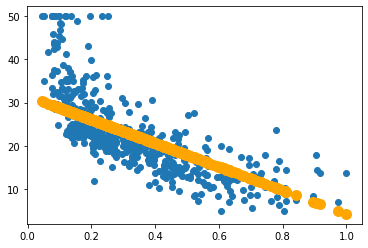

loss =  41.196262


In [40]:
from IPython.display import clear_output

for i in range(500):
    y_pred = w*x + b
    
    loss = torch.mean((y_pred - y)**2)
    loss.backward()
    
    # do step of gradient descent with parameter lr = .05
    w.data -= .05*w.grad
    b.data -= .05*b.grad
    
    # reset gradients to avoid accumulate it
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    # creating images
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(), color='orange', linewidth=5)
        # Note: x.data.numpy() is casting torch.tensor type to numpy.ndarray type
        plt.show()
        
        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

## Neuron Network (Calculation graph)

In PyTorch data placed in class *torch.utils.data.Dataset*. In order to take some dataset we should create, class-inheritant from this class.

Neuron network itself (model) placed in class *torch.nn.model*

Optimizer placed in class *torch.optim*

In [41]:
# Suppose we have a dataset of random numbers

class RandomDataSet(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
        #Note: this method is redefine of method len() for objects of its class
    
    def __getitem__(self, idx):
        return {'sample' : torch.tensor(self.x[idx], dtype=torch.float), 'target' : self.y[idx]}
        # Note: this method is redefine of operator []
        
# All of the __%name_of_method%__ methods it's standard methods of class available for overriding

In [42]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [43]:
our_dataset = RandomDataSet(x, y)

In [44]:
our_dataset.__getitem__(1)

{'sample': tensor([0.2055, 0.6686, 0.4989, 0.5198, 0.5776]),
 'target': 0.7389273338819133}

In order to use batches for stochastic gradient descent use **dataloader** which placed in class *torch.utils.data.DataLoader*. It take an input class that inherits from class *torch.utils.data.DataSet*.

In [45]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4) # shuffle=True allows do shuffling of rows in batch

If number of rows in dataset don't completely divided by *butch_size*, use in declaration of dataloader additional parameter *drop_last=True*. This will throw out the remaining elements so that the sizes of all batches are divisible by *butch_size*.

In [46]:
# Batches look like this (dataloader is iterable):

for batch in dataloader:
    batch_x = batch['sample']
    batch_y = batch['target']
    break

print("Sample: \n", batch_x, "\n")
print("Target: \n", batch_y)

Sample: 
 tensor([[0.3787, 0.8784, 0.3637, 0.2838, 0.7214],
        [0.2055, 0.6686, 0.4989, 0.5198, 0.5776],
        [0.0414, 0.3916, 0.6284, 0.5648, 0.9552],
        [0.2917, 0.0865, 0.5449, 0.7664, 0.8679]]) 

Target: 
 tensor([0.7771, 0.7389, 0.6229, 0.7036], dtype=torch.float64)


### At last, let's create neuron network 

In PyTorch in order to create neuron network we will use module *nn*. Class which create neuron network should inherits from class *nn.Module*

Conceptually in programm point of view class of neuron network consists of following basic parts:
1. \_\_init__ method
2. *.forvard method*, that defines direct passage of neuron network. Module *nn.functional* includes activation functions

### Conceptually it looks like:
---

    class Model(nn.Module):
        def __init__(self):
            super(Model, self).__init__()
            self.conv1 = nn.Conv2d(1, 20, 50)
            self.conv2 = nn.Conv2d(20, 20, 50)
        
        def forward(self, x):
            x = nn.functional.relu(self.conv1(x))
            return nn.functional.relu(self.conv2(x))

---
Creating your own class is the best way to create neuron network in PyTorch

But we can create network in the different way, by using PyTorch already created methods directly.

In [47]:
model = nn.Sequential() # The empty model in which we will add layers
model.add_module('11', nn.Linear(5, 3)) # Adding fully connected layer with 5 neurons on input and 3 on output
model.add_module('12', nn.ReLU()) # Adding ReLU nonlinearity layer after the first layer
model.add_module('13', nn.Linear(3, 1)) # Adding fully connected layer with 3 neurons on input and 1 on output

# it's equevalent of
#model = nn.Sequential( 
    #nn.Linear(5, 3), 
    #nn.ReLU(),
    #nn.Linear(3, 1)
#)

In [48]:
ttt = torch.randn(15, 4) # batch that consists from 15 rows with 4 elements in every
ttt

tensor([[-1.6935e+00, -2.4783e-01, -1.0288e+00, -3.9748e-01],
        [-2.4704e+00,  2.4294e-02, -3.0453e-01, -1.0194e+00],
        [ 1.4369e+00,  5.8908e-01, -1.4134e+00,  2.1266e+00],
        [ 1.6562e-01, -5.7275e-01, -1.3027e+00, -5.2991e-01],
        [-7.7616e-01,  1.5373e-01, -2.4018e+00, -1.6540e-01],
        [ 5.6103e-01, -1.4720e-01, -7.8097e-02, -1.1800e+00],
        [-1.9954e+00, -6.5378e-01,  1.0890e+00,  5.0236e-01],
        [ 3.7458e-01,  1.3159e+00,  4.5651e-01,  1.3042e+00],
        [-9.8004e-02, -1.1339e+00,  6.2873e-02,  7.0396e-01],
        [ 7.3259e-01, -1.0026e+00, -3.9175e-01, -1.0789e+00],
        [-1.0184e+00,  1.9400e+00, -2.1004e-01, -7.4507e-01],
        [-3.6327e-01,  3.0375e+00, -1.9777e-03, -8.1536e-01],
        [-1.0294e+00, -2.5466e-01, -6.0485e-01, -4.2503e-01],
        [ 7.4818e-01, -9.0062e-01,  1.1880e+00, -3.1461e-01],
        [-5.0202e-01, -4.8585e-01,  3.6460e-01, -9.2442e-02]])

In [49]:
fc = nn.Linear(4, 3)
fc(ttt)

tensor([[-0.4942,  0.2078,  0.5835],
        [-0.3238,  0.3664,  1.0699],
        [-0.2736, -0.5838, -1.9415],
        [-0.2705, -0.3332, -0.0929],
        [-0.4665,  0.0718, -0.2950],
        [ 0.2282, -0.5596, -0.1199],
        [-0.5349,  0.1326,  1.0092],
        [ 0.1812, -0.4290, -1.3227],
        [-0.5250, -0.3511,  0.1890],
        [-0.0475, -0.6077,  0.1496],
        [ 0.4278, -0.0026, -0.5766],
        [ 0.8955, -0.1815, -1.3580],
        [-0.3117, -0.0255,  0.3634],
        [ 0.0592, -0.7195,  0.1364],
        [-0.2097, -0.2605,  0.3047]], grad_fn=<AddmmBackward0>)

In [50]:
y_pred = model(batch_x) # Prediction of model

### Writing of loop of fitting and tracking of metrics

We will download data from MNIST dataset and fit our model on it

In [51]:
mnist_train = torchvision.datasets.MNIST(
    './mnist/', train=True, download=True,
    transform=torchvision.transforms.ToTensor()
) # We use already created PyTorch class for dowloading of data - we download data for training only

mnist_val = torchvision.datasets.MNIST(
    './mnist/', train=False, download=True,
    transform=torchvision.transforms.ToTensor()
) # We use already created PyTorch class for dowloading of data - we download data for validation only

In [52]:
mnist_train # About our MNIST train set

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./mnist/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [53]:
mnist_train[5][0].shape # As you can see, element of our train set is image 28x28 with one color channel

torch.Size([1, 28, 28])

In [54]:
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
) # num_workers is number of CPUs, which bisy at calculations (num_workers=-1 is means take all the avaliable CPUs)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=True, num_workers=1
) # num_workers is number of CPUs, which bisy at calculations (num_workers=-1 is means take all the avaliable CPUs)

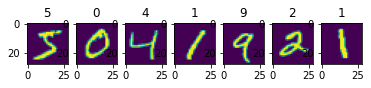

In [55]:
for i in [0, 1, 2, 3, 4, 5, 6]:
    plt.subplot(1, 7, i+1)
    # we are deleting channel dimention in image before plotting
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [56]:
model = nn.Sequential(
    nn.Flatten(),            # Transform image of dim = 1x28x28 into (1, 784) vector
    nn.Linear(784, 128),     # Adding of fully connected layer with 784 neurons on input and 128 on output
    nn.ReLU(),               # Adding of ReLU nonlinearity layer
    nn.Linear(128, 10),      # Adding of fully connected layer with 128 neurons on input and 10 on output
    nn.Softmax(dim=-1)       # Using softmax function in order to give probability distribution under classes labels
)

# Optimizer for fitting of network (here we used stochastic gradient descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [57]:
[x for x in model.named_parameters()] # List of parameters of model (1 and 3 it's layers of network)

[('1.weight',
  Parameter containing:
  tensor([[ 4.1491e-03,  1.6459e-02,  2.4941e-03,  ...,  2.8835e-02,
           -6.4816e-03,  1.8533e-02],
          [ 3.3097e-02, -1.1335e-02,  3.4553e-02,  ...,  4.4197e-05,
           -1.6680e-02, -2.7293e-02],
          [ 2.1312e-02, -2.1692e-02,  1.1552e-02,  ...,  1.3145e-03,
           -1.7213e-02, -2.7359e-02],
          ...,
          [ 2.0850e-03, -9.5311e-03,  8.5124e-03,  ...,  1.7645e-02,
            1.2745e-02, -2.1100e-02],
          [ 2.9316e-02, -1.6808e-02,  3.2225e-02,  ...,  1.5839e-02,
            7.3458e-03, -1.3151e-02],
          [ 3.2316e-02,  1.1119e-02,  1.9880e-02,  ...,  3.2575e-02,
           -1.2475e-02,  3.2306e-02]], requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-0.0159,  0.0279,  0.0004,  0.0204,  0.0257,  0.0090, -0.0245, -0.0291,
          -0.0115,  0.0292,  0.0221,  0.0090,  0.0028,  0.0293,  0.0216,  0.0285,
          -0.0090, -0.0314,  0.0213,  0.0136,  0.0348,  0.0045, -0.0125, -0.0158,


### Fitting of our model which defined above

In [58]:
for epoch in range(11): # We have 10 epochs
    for x_train, y_train in tqdm(train_dataloader):
        y_pred = model(x_train)
        loss = F.cross_entropy(y_pred, y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
    if epoch % 2 == 0:
        val_loss = []
        val_accuracy = []
        
        for x_val, y_val in tqdm(val_dataloader):
            y_pred_val = model(x_val)
            loss = F.cross_entropy(y_pred_val, y_val)
            val_loss.append(loss.item())
            val_accuracy.extend( (torch.argmax(y_pred_val, dim=-1) == y_val).detach().numpy().tolist() )
        print('Epoch: {epoch}, Loss: {loss}, Accuracy: {accuracy}'.format(
            epoch=epoch, loss=np.mean(val_loss), accuracy=np.mean(val_accuracy)
        ))

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, Loss: 1.5360216788291932, Accuracy: 0.9319


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, Loss: 1.5112715605258942, Accuracy: 0.9521


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, Loss: 1.4971261579990387, Accuracy: 0.9672


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 6, Loss: 1.4936772417545319, Accuracy: 0.9697


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 8, Loss: 1.489091137933731, Accuracy: 0.9743


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 10, Loss: 1.4908704790592193, Accuracy: 0.9717


In [59]:
for k in y_pred:
    print(torch.where(k == torch.max(k).item())[0])

tensor([3])
tensor([8])
tensor([1])
tensor([7])


In [60]:
y_train

tensor([3, 8, 1, 7])

## Validation 

The model is fitted now. Let's check quality of fitting on validation dataset. Implementation of validation already exists in loop above, but we moved it here for clarity.

In [61]:
for x_val, y_val in tqdm(train_dataloader):
        y_pred_val = model(x_val)

  0%|          | 0/15000 [00:00<?, ?it/s]

In [62]:
print("Prediction: \n")
for k in y_pred_val:
    print(torch.where(k == torch.max(k).item())[0])

Prediction: 

tensor([6])
tensor([7])
tensor([9])
tensor([6])


In [63]:
print("Ground truth: \n")

y_val

Ground truth: 



tensor([6, 7, 9, 6])